### <span style="color:Red">Let us start by importing pandas library</span>.

In [110]:
import pandas as pd

### <span style="color:Red"> let us read the data</span>.
    we can use fle source as csv,excel, sql server, hadoop etc

In [119]:
data = pd.read_csv('sales_data.csv')

### <span style="color:Red"> Lets us look at the data first and couple of information</span>.

### <span style="color:Blue">1) shape</span>.

In [17]:
data.shape # I can find out that total 100 rows and 14 column are present
# we can also use directly len() function to fint the length of the data frame
len(data)

(100, 14)

### <span style="color:Blue">2) head()</span>.

In [4]:
# it prints top 5 rows in data, you can use data.head(15) and it will give top 15 rows or any number as a parameter in head() funtion
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933.0,NaN,9925.0,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480.0,9/15/2012,2804.0,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157.0,05-08-2014,1779.0,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792.0,07-05-2014,8102.0,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712.0,02-06-2013,5062.0,651.21,524.96,3296425.02,2657347.52,639077.50


### <span style="color:Blue">3) tail()</span>.

In [5]:

# lets look at the tail of the data, same thig apply to tail as well, you can pass number of rows
data.tail()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119.0,09-03-2011,888.0,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11-11-2011,810711038.0,12/28/2011,6267.0,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,06-01-2016,728815257.0,6/29/2016,1485.0,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106.0,08-08-2015,5767.0,81.73,56.67,471336.91,326815.89,144521.02
99,Sub-Saharan Africa,Mozambique,Household,Offline,L,02-10-2012,665095412.0,2/15/2012,5367.0,668.27,502.54,3586605.09,2697132.18,889472.91


### <span style="color:Blue">4) iloc() and loc()</span>.

In [14]:


# I can also see the data by using iloc() function
data.iloc[0:5, 1:7] # here we have used two things, row indexing and column indexing

,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID
0,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933.0
1,Grenada,Cereal,Online,C,8/22/2012,963881480.0
2,Russia,Office Supplies,Offline,L,05-02-2014,341417157.0
3,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792.0
4,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712.0


In [15]:
# here, we can access the data using the labels instead of giving number in column index

data.loc[0:5, ['Region']]

,Region
0,Australia and Oceania
1,Central America and the Caribbean
2,Europe
3,Sub-Saharan Africa
4,Sub-Saharan Africa
5,Australia and Oceania


In [16]:
data.loc[0:5, ['Region','Sales Channel','Order Priority']]

,Region,Sales Channel,Order Priority
0,Australia and Oceania,Offline,H
1,Central America and the Caribbean,Online,C
2,Europe,Offline,L
3,Sub-Saharan Africa,Online,C
4,Sub-Saharan Africa,Offline,L
5,Australia and Oceania,Online,C


### <span style="color:Blue">5) let us look at all the column names</span>.

In [18]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

### <span style="color:Blue">7) Before doing any kind of manipulation(deleting or dropping) on my data, let me make a copy of my data first in case i will need it in later stage</span>.

In [21]:
data_copied = data.copy()

### <span style="color:Blue">8) I am not going to analyse anything on date columns, let us drop those columns</span>.

#### a) there are two way to do that, more trivial way  is create a list with all the columns you want to delete then use function drop()

In [112]:
col_to_drop = ['Order Date', 'Ship Date']
print("Printing the list with trivial method :", col_to_drop)
# a) faster and automated way is to create a list with all the columns using for loop
col_to_drop = []
for col in data.columns:
    if 'date' in col.lower():
        col_to_drop.append(col)
print("Printing the list with looping method :", col_to_drop)

Printing the list with trivial method : ['Order Date', 'Ship Date']
Printing the list with looping method : ['Order Date', 'Ship Date']


### <span style="color:Blue">9) Let us now drop the column we decided in previous step again two ways(two type of codes)</span>.

#### a) directly dropping from data frame

In [120]:
data.drop(col_to_drop, axis=1, inplace = True)

#### a) another way that is used( recommend using previous method), but first check whether it will run???

In [114]:
data = data.drop(col_to_drop, axis=1)

#Note:
# The reason the above code did not run is we have already dropped the column hence it throws error of 'KeyError'
# which means then the columns you passed does not exists


KeyError: "['Order Date' 'Ship Date'] not found in axis"

### <span style="color:Blue">10) This brings to another concept in data preparation, many a times you want to add few columns in your data from other data set which is data merging</span>.

In [30]:
# another way of finding length
data.columns.__len__()

12

In [115]:
data_copied.columns.__len__() # two extra columns because my copied data still have 'Ship Date' and 'Order Date'

14

In [121]:
merged_data = data.merge(data_copied)
merged_data


,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Date,Ship Date
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,669165933.0,9925.0,255.28,159.42,2533654.00,1582243.50,951410.50,5/28/2010,NaN
1,Central America and the Caribbean,Grenada,Cereal,Online,C,963881480.0,2804.0,205.70,117.11,576782.80,328376.44,248406.36,8/22/2012,9/15/2012
2,Europe,Russia,Office Supplies,Offline,L,341417157.0,1779.0,651.21,524.96,1158502.59,933903.84,224598.75,05-02-2014,05-08-2014
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,514321792.0,8102.0,9.33,6.92,75591.66,56065.84,19525.82,6/20/2014,07-05-2014
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,115456712.0,5062.0,651.21,524.96,3296425.02,2657347.52,639077.50,02-01-2013,02-06-2013
5,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,115456712.0,5062.0,651.21,524.96,3296425.02,2657347.52,639077.50,02-01-2013,02-06-2013
6,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,115456712.0,5062.0,651.21,524.96,3296425.02,2657347.52,639077.50,02-01-2013,02-06-2013
7,Australia and Oceania,Solomon Islands,Baby Food,Online,C,547995746.0,2974.0,255.28,159.42,759202.72,NaN,285087.64,02-04-2015,2/21/2015
8,Sub-Saharan Africa,Angola,Household,Offline,M,135425221.0,4187.0,668.27,502.54,2798046.49,2104134.98,693911.51,4/23/2011,NaN
9,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,871543967.0,8082.0,154.06,90.93,1245112.92,734896.26,510216.66,7/17/2012,NaN


![title](merge_options.jpg)

In [102]:
# Let us look at couple of examples
import pandas as pd
left = pd.DataFrame({
   'id':[1,2,3,4,5],
   'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
   'subject_id':['sub1','sub2','sub4','sub6','sub5']})
right = pd.DataFrame(
   {'id':[1,2,3,4,5],
   'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
   'subject_id':['sub2','sub4','sub3','sub6','sub5']})

left



,id,Name,subject_id
0,1,Alex,sub1
1,2,Amy,sub2
2,3,Allen,sub4
3,4,Alice,sub6
4,5,Ayoung,sub5


In [103]:
right

,id,Name,subject_id
0,1,Billy,sub2
1,2,Brian,sub4
2,3,Bran,sub3
3,4,Bryce,sub6
4,5,Betty,sub5


### Merge Two DataFrames on a Key

In [104]:
pd.merge(left,right,on='id')

,id,Name_x,subject_id_x,Name_y,subject_id_y
0,1,Alex,sub1,Billy,sub2
1,2,Amy,sub2,Brian,sub4
2,3,Allen,sub4,Bran,sub3
3,4,Alice,sub6,Bryce,sub6
4,5,Ayoung,sub5,Betty,sub5


### Merge Two DataFrames on Multiple Keys

In [105]:
pd.merge(left,right,on=['id','subject_id'])

,id,Name_x,subject_id,Name_y
0,4,Alice,sub6,Bryce
1,5,Ayoung,sub5,Betty


### left

In [106]:
pd.merge(left, right, on='subject_id', how='left')

,id_x,Name_x,subject_id,id_y,Name_y
0,1,Alex,sub1,NaN,NaN
1,2,Amy,sub2,1.0,Billy
2,3,Allen,sub4,2.0,Brian
3,4,Alice,sub6,4.0,Bryce
4,5,Ayoung,sub5,5.0,Betty


### Right

In [107]:
pd.merge(left, right, on='subject_id', how='right')

,id_x,Name_x,subject_id,id_y,Name_y
0,2.0,Amy,sub2,1,Billy
1,3.0,Allen,sub4,2,Brian
2,4.0,Alice,sub6,4,Bryce
3,5.0,Ayoung,sub5,5,Betty
4,NaN,NaN,sub3,3,Bran


### Outer

In [108]:
pd.merge(left, right, how='outer', on='subject_id')

,id_x,Name_x,subject_id,id_y,Name_y
0,1.0,Alex,sub1,NaN,NaN
1,2.0,Amy,sub2,1.0,Billy
2,3.0,Allen,sub4,2.0,Brian
3,4.0,Alice,sub6,4.0,Bryce
4,5.0,Ayoung,sub5,5.0,Betty
5,NaN,NaN,sub3,3.0,Bran


### Inner

In [109]:
pd.merge(left, right, on='subject_id', how='inner')

,id_x,Name_x,subject_id,id_y,Name_y
0,2,Amy,sub2,1,Billy
1,3,Allen,sub4,2,Brian
2,4,Alice,sub6,4,Bryce
3,5,Ayoung,sub5,5,Betty


### <span style="color:Blue">11) Let us now look at some stats/info about the column</span>.

### info()

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 12 columns):
Region            96 non-null object
Country           99 non-null object
Item Type         99 non-null object
Sales Channel     97 non-null object
Order Priority    100 non-null object
Order ID          100 non-null float64
Units Sold        102 non-null float64
Unit Price        98 non-null float64
Unit Cost         102 non-null float64
Total Revenue     99 non-null float64
Total Cost        100 non-null float64
Total Profit      99 non-null float64
dtypes: float64(7), object(5)
memory usage: 9.8+ KB


### describe()

In [178]:
data.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,102.000000,98.000000,102.000000,9.900000e+01,1.000000e+02,9.900000e+01
mean,5.430247e+08,5089.686275,281.173878,199.607745,1.434936e+06,9.368894e+05,4.418101e+05
std,2.665254e+08,2744.828459,238.911604,192.726190,1.481287e+06,1.060752e+06,4.319986e+05
min,1.146066e+08,124.000000,9.330000,6.920000,6.279090e+03,3.612240e+03,1.258020e+03
25%,3.215533e+08,2866.250000,81.730000,35.840000,2.986909e+05,1.688680e+05,1.223581e+05
50%,5.354181e+08,5097.000000,179.880000,117.110000,7.935180e+05,3.635664e+05,2.964483e+05
75%,7.907551e+08,7303.750000,437.200000,339.350000,2.513090e+06,1.716181e+06,6.390775e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


### <span style="color:Blue">12) Let us now remove the duplicates from the dataframe</span>.

In [180]:
data[data.duplicated()]

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
5,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,115456712.0,5062.0,651.21,524.96,3296425.02,2657347.52,639077.5
26,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,115456712.0,5062.0,651.21,524.96,3296425.02,2657347.52,639077.5
72,Sub-Saharan Africa,The Gambia,Meat,Online,M,825304400.0,4767.0,421.89,364.69,2011149.63,1738477.23,272672.4


### detecting and dropping duplicate values with dummy df

In [129]:
dup = pd.DataFrame({
   'id':[1,2,3,4,5,2,5],
   'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung','Amy','Ayoung'],
   'subject_id':['sub1','sub2','sub4','sub6','sub5','sub2','sub5']})

dup

,id,Name,subject_id
0,1,Alex,sub1
1,2,Amy,sub2
2,3,Allen,sub4
3,4,Alice,sub6
4,5,Ayoung,sub5
5,2,Amy,sub2
6,5,Ayoung,sub5


In [ ]:
dup[dup.duplicated()] # look at the duplicated rows

In [133]:
#dup.drop_duplicates(keep = 'first')
#dup.drop_duplicates(keep = 'last')
#dup.drop_duplicates(keep = False)

,id,Name,subject_id
0,1,Alex,sub1
2,3,Allen,sub4
3,4,Alice,sub6


### <span style="color:Blue">13) Checking unique values in data frame</span>.

In [181]:
unique = []
col_names = []
for col in data.columns:
    unique.append(len(data[col].unique()))
    col_names.append(col)
    print(col, "---",len(data[col].unique()))

Region --- 8
Country --- 76
Item Type --- 13
Sales Channel --- 3
Order Priority --- 5
Order ID --- 98
Units Sold --- 99
Unit Price --- 13
Unit Cost --- 13
Total Revenue --- 97
Total Cost --- 98
Total Profit --- 97


<BarContainer object of 14 artists>

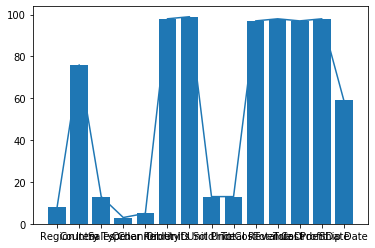

In [150]:
import matplotlib.pyplot as plt
plt.plot(unique)
plt.bar(col_names, unique)
plt.xlabel()

### <span style="color:Blue">14) Print all the rows of europe region ( Data filtering/slicing)</span>.

In [182]:
data[(data['Region'] == 'Europe') & (data['Sales Channel'] == 'Online') & 
           (data['Total Revenue'] < 500000)]
# data.Region

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
16,Europe,Bulgaria,Clothes,Online,M,972292029.0,1673.0,109.28,35.84,182825.44,59960.32,122865.12
22,Europe,Portugal,Baby Food,Online,H,860673511.0,1273.0,255.28,159.42,324971.44,202941.66,122029.78
25,Europe,Moldova,Personal Care,Online,L,740147912.0,5070.0,81.73,56.67,414371.10,287316.90,127054.20
49,Europe,Switzerland,Personal Care,Online,M,617667090.0,273.0,81.73,56.67,22312.29,15470.91,6841.38
52,Europe,Albania,Clothes,Online,C,385383069.0,2269.0,109.28,35.84,247956.32,81320.96,166635.36
60,Europe,United Kingdom,Household,Online,L,955357205.0,282.0,668.27,502.54,188452.14,141716.28,46735.86


Region            7
Country           4
Item Type         4
Sales Channel     6
Order Priority    3
Order ID          3
Units Sold        1
Unit Price        5
Unit Cost         1
Total Revenue     4
Total Cost        3
Total Profit      4
dtype: int64

### <span style="color:Blue">15) Total Profit in Europe region(Sum of profit on condition)</span>.

In [166]:
data[data['Region'] == 'Europe']['Total Profit'].sum()
# data[datadata['Region'] == 'Europe']['Total Profit'].mean()
# data[data['Region'] == 'Europe']['Total Profit'].median()

10132595.739999998